In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
from matplotlib.ticker import LogFormatter
from scipy.stats import poisson

/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'min. number of events x such that $\\mathbb{P}(k\\geq$x)')

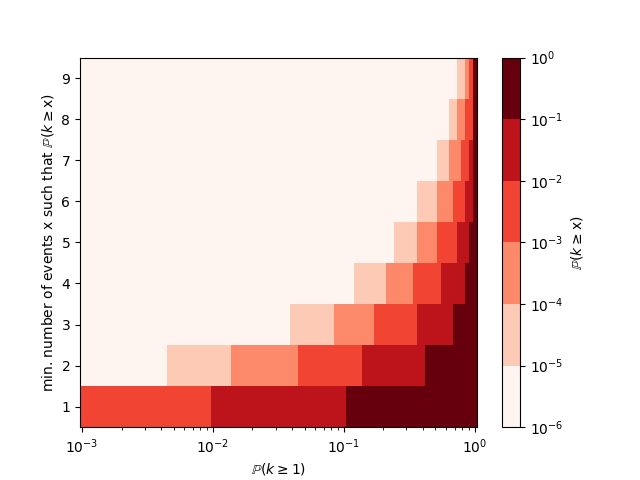

In [4]:
def get_proba_from_more_events(proba, nevent):
    lambda_ = -np.log(1 - proba)  # inferred from known P(≥1)
    P_ge_n = 1 - poisson.cdf(nevent-1, mu=lambda_)
    return P_ge_n

probas_l = np.logspace(-3, 0, 100)
n_events = np.arange(1,10)
PL, NE = np.meshgrid(probas_l, n_events)
shape_init = PL.shape
PL, NE = PL.ravel(), NE.ravel()

Pk = np.zeros_like(PL)
ii = 0
for one_pl, one_ne in zip(PL, NE):
    Pk[ii] = get_proba_from_more_events(one_pl, one_ne)
    ii += 1
Pk = Pk.reshape(shape_init)

levels = np.linspace(0., 1, 10)  # 7 bins
levels = np.logspace(-6, 0, 7)  # 7 bins
cmap = get_cmap('Reds', len(levels) - 1)
norm = BoundaryNorm(boundaries=levels, ncolors=cmap.N)

plt.figure()
sc = plt.pcolormesh(probas_l, n_events, Pk, cmap=cmap, norm=norm, shading='auto')
cbar = plt.colorbar(sc,ticks=levels, boundaries=levels)
cbar.ax.set_yticks(levels)
cbar.ax.set_yticklabels([f'$10^{{{np.log10(lvl):.0f}}}$' for lvl in levels])
#cbar.ax.yaxis.set_major_formatter(LogFormatter())
cbar.ax.set_ylabel('$\mathbb{P}(k\geq$x)')
plt.xscale('log')
plt.xlabel('$\mathbb{P}(k\geq$1)')
plt.ylabel('min. number of events x such that $\mathbb{P}(k\geq$x)')

In [ ]:
plt.savefig('./figures/P_k_over_x.pdf')